Using segmentation analysis to get a better insight into customers. RFM technique is used here to get an understanding of consumer buying behaviours. This technique will allow to put customers into different buckets to build a detailed customer profile. 

The focus would be to understand customer interaction with the company with the aim to understand when was the last purchase - regency, the number of times the customer has purchased - frequency, and how much the customer has spent - monetary

In [1]:
# import libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import squarify
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# data load
sales = pd.read_csv('sales.csv')

In [3]:
sales.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

Data cleanse

In [4]:
sales.nunique()

TransactionNo    23204
Date               305
ProductNo         3768
ProductName       3768
Price              530
Quantity           510
CustomerNo        4738
Country             38
dtype: int64

In [5]:
sales.duplicated().sum()

5200

In [6]:
sales = sales.drop_duplicates()
sales.duplicated().sum()

0

In [7]:
# identifying our null values
sales.isna().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [8]:
# sales['CustomerNo'] = sales['CustomerNo'].fillna(0)
# Drop na values instead of replacing it with 0 for better rfm analysis
sales=sales.dropna(subset= ['CustomerNo'])

In [9]:
sales.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [10]:
sales.head(2)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,"17,490.00",United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,"13,069.00",United Kingdom


In [11]:
# Copy data to start working on it
df=sales.copy()

Identify negative values to remove from our analysis

In [12]:
df[df['Quantity'] < 0].head(2)


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
1616,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,"16,446.00",United Kingdom
1617,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,"14,397.00",United Kingdom


It's clear from the above, we have negative quantity numbers with a C possibly standing for cancelled transactions. We will need to remove this from our equation

In [13]:
# ignoring transactions with cancelled values
df=df[~df['TransactionNo'].str.contains('C' ,na = False)]

In [14]:
# checking to ensure it's not included
df[df['Quantity'] < 0].head(2)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country


In [15]:
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [16]:
# Datatype updates
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'])
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['CustomerNo'] = df['CustomerNo'].map(int)
df['CustomerNo'] = df['CustomerNo'].map(str)

In [17]:
# Adding extra columns to separate our dates
df['Time'] = df['Date'].dt.time
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day_name()
df['Year']= df['Date'].dt.year

In [18]:
df.dtypes

TransactionNo            object
Date             datetime64[ns]
ProductNo                object
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo               object
Country                  object
Time                     object
Month                    object
Day                      object
Year                      int64
dtype: object

In [19]:
# Add a total cost column
df['Total_Cost'] = df['Quantity'] * df['Price']
# set our current date
current_date=df['Date'].max()

For RFM analysis, we will need to group our customer numbers, and we will need the sum of total cost, counts of transaction numbers, maximum date to create our model

In [20]:
rfm=df.groupby('CustomerNo').agg({'Date': lambda a: (current_date - a.max()).days,
                                  'TransactionNo': 'count',
                                  'Total_Cost': 'sum'
                                 })
rfm

,Date,TransactionNo,Total_Cost
CustomerNo,,,
12004,227,56,"1,509.60"
12006,218,1,24.76
12008,276,203,"5,689.57"
12013,359,1,69.96
12024,176,5,149.52
...,...,...,...
18280,277,10,623.26
18281,180,7,576.58
18282,7,12,"1,044.86"


In [21]:
# Renaming columns
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerNo,,,
12004,227,56,"1,509.60"
12006,218,1,24.76
12008,276,203,"5,689.57"
12013,359,1,69.96
12024,176,5,149.52
...,...,...,...
18280,277,10,623.26
18281,180,7,576.58
18282,7,12,"1,044.86"


In [22]:
# remove customers with 0 values from analysis
rfm = rfm[rfm['Monetary']>0]

In [23]:
rfm.dtypes

Recency        int64
Frequency      int64
Monetary     float64
dtype: object

/var/folders/zv/gfvqnk2x0972ygvfdf81g3z80000gn/T/ipykernel_82776/4157588756.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[data])


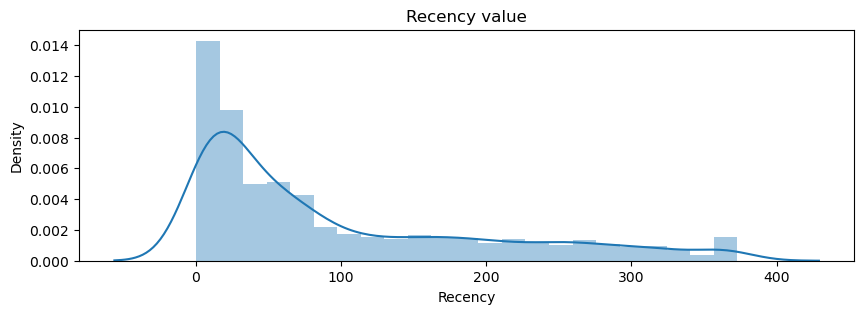

/var/folders/zv/gfvqnk2x0972ygvfdf81g3z80000gn/T/ipykernel_82776/4157588756.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[data])


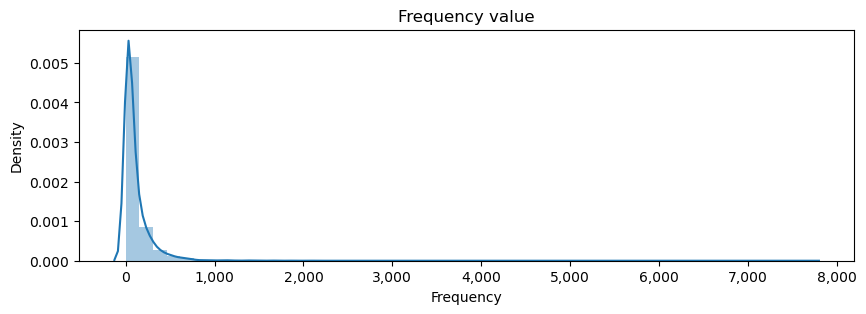

/var/folders/zv/gfvqnk2x0972ygvfdf81g3z80000gn/T/ipykernel_82776/4157588756.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[data])


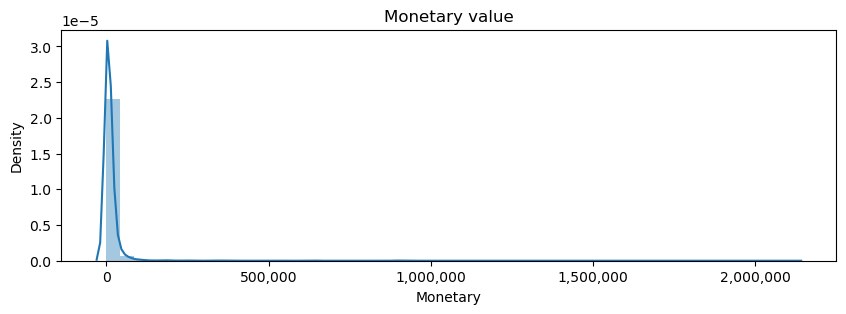

In [24]:
# Plot RFM model
rfm_names=['Recency', 'Frequency', 'Monetary']

for data in rfm_names:
    fig, ax = plt.subplots(figsize=(10,3))
    sns.distplot(rfm[data])
    ax.set_title('%s value' % data)
    fmt = FuncFormatter('{:,.0f}'.format)
    plt.gca().xaxis.set_major_formatter(fmt)
    plt.show()

In [25]:
# Assign score
rfm['R']= pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm['F']=pd.qcut(rfm['Frequency'],5,labels=[1,2,3,4,5])
rfm['M']=pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerNo,,,,,,
12004,227,56,"1,509.60",1,3,2
12006,218,1,24.76,1,1,1
12008,276,203,"5,689.57",1,5,3
12013,359,1,69.96,1,1,1
12024,176,5,149.52,2,1,1
...,...,...,...,...,...,...
18280,277,10,623.26,1,1,1
18281,180,7,576.58,2,1,1
18282,7,12,"1,044.86",5,1,1


Assigning scores with 5 being the highest and 1, the lowest score. For regency, the scores are assigned from 5 to 1 where the value 5 represents the purchase made recently so recent customers will get higher regency score. 

1 to 5 scores for frequency means customers with more frequent purchases will receive the highest frequency score so the more purchases made from customers, the higher the score. Similarly, the more money is spent on purchases by customers, the higher the monetary score so customers that have spent a higher amount of money in the company will get a higher score.

In [26]:
# Grouping RFM before summing up the total to add segmentation values against individual score
rfm['RFM_Group'] = (rfm['R'].astype(str)+'-' + rfm['F'].astype(str)+'-' + rfm['M'].astype(str))
rfm['RFM_Total_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm['Segment'] = pd.qcut(rfm['RFM_Total_Score'],3, labels=['Low-Value', 'Mid-Value', 'High-Value'])
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Total_Score,Segment
CustomerNo,,,,,,,,,
12004,227,56,"1,509.60",1,3,2,1-3-2,6,Low-Value
12006,218,1,24.76,1,1,1,1-1-1,3,Low-Value
12008,276,203,"5,689.57",1,5,3,1-5-3,9,Mid-Value
12013,359,1,69.96,1,1,1,1-1-1,3,Low-Value
12024,176,5,149.52,2,1,1,2-1-1,4,Low-Value
...,...,...,...,...,...,...,...,...,...
18280,277,10,623.26,1,1,1,1-1-1,3,Low-Value
18281,180,7,576.58,2,1,1,2-1-1,4,Low-Value
18282,7,12,"1,044.86",5,1,1,5-1-1,7,Low-Value


Adding a more defined segmentation to represent the rfm model 

In [27]:
# Start segmentation by defining our function
def segment(rfm):
    if rfm['RFM_Total_Score'] >= 10:
        return 'Champions'
    elif ((rfm['RFM_Total_Score'] >= 9) and (rfm['RFM_Total_Score'] < 10)):
        return 'Loyal Customers'
    elif ((rfm['RFM_Total_Score'] >= 8) and (rfm['RFM_Total_Score'] < 9)):
        return 'Potential Customers'
    elif ((rfm['RFM_Total_Score'] >= 7) and (rfm['RFM_Total_Score'] < 8)):
        return 'Promising Customers'
    elif ((rfm['RFM_Total_Score'] >= 6) and (rfm['RFM_Total_Score'] < 7)):
        return 'Attention Required'
    elif ((rfm['RFM_Total_Score'] >= 5) and (rfm['RFM_Total_Score'] < 6)):
        return 'Cannot lose them'
    elif ((rfm['RFM_Total_Score'] >= 4) and (rfm['RFM_Total_Score'] < 5)):
        return 'At risk'
    else:
        return 'Hibernating'
# apply function
rfm['Segmentation'] =rfm.apply(segment, axis=1)

In [28]:
# final result
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Total_Score,Segment,Segmentation
CustomerNo,,,,,,,,,,
12004,227,56,"1,509.60",1,3,2,1-3-2,6,Low-Value,Attention Required
12006,218,1,24.76,1,1,1,1-1-1,3,Low-Value,Hibernating
12008,276,203,"5,689.57",1,5,3,1-5-3,9,Mid-Value,Loyal Customers
12013,359,1,69.96,1,1,1,1-1-1,3,Low-Value,Hibernating
12024,176,5,149.52,2,1,1,2-1-1,4,Low-Value,At risk
...,...,...,...,...,...,...,...,...,...,...
18280,277,10,623.26,1,1,1,1-1-1,3,Low-Value,Hibernating
18281,180,7,576.58,2,1,1,2-1-1,4,Low-Value,At risk
18282,7,12,"1,044.86",5,1,1,5-1-1,7,Low-Value,Promising Customers


In [29]:
# further analysis
rfmAgg=rfm.groupby('Segmentation').agg(
    {'Recency': 'mean',
    'Frequency': 'mean',
    'RFM_Total_Score': 'sum',
    'Monetary': ['mean','count','sum']}).reset_index()
rfmAgg

Segmentation Recency Frequency RFM_Total_Score  Monetary        \
                          mean      mean             sum      mean count   
0              At risk  205.31     11.73            1080  1,058.82   270   
1   Attention Required  131.57     22.85            2292  2,216.91   382   
2     Cannot lose them  183.30     19.53            1910  1,667.82   382   
3            Champions   37.53    209.52           26215 25,207.20  2127   
4          Hibernating  286.56      6.22             873    640.24   291   
5      Loyal Customers   77.95     59.87            3924  6,855.49   436   
6  Potential Customers   89.36     43.95            3200  4,269.12   400   
7  Promising Customers  102.85     28.15            3010  5,843.69   430   

                 
            sum  
0    285,880.32  
1    846,859.48  
2    637,108.14  
3 53,615,715.35  
4    186,310.70  
5  2,988,995.78  
6  1,707,647.98  
7  2,512,786.79